In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast = load_breast_cancer()

In [5]:
X = pd.DataFrame(breast['data'], columns = breast['feature_names'])

In [6]:
Y = breast['target']

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
np.unique(Y, return_counts = True)

(array([0, 1]), array([212, 357]))

<AxesSubplot:ylabel='count'>

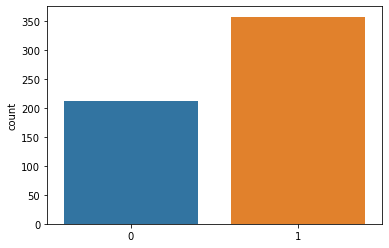

In [10]:
sns.countplot(x=Y)

----
# Train, Test Data Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
random_seed = 20220518

In [13]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = random_seed)

----

In [15]:
from sklearn.tree import DecisionTreeClassifier as DT

In [396]:
dt = DT(max_depth = 6)

In [397]:
dt.fit(Train_X, Train_Y)

DecisionTreeClassifier(max_depth=6)

In [398]:
pred = dt.predict(Test_X)

In [399]:
pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [400]:
# pred[pred > 0.5] = 1
# pred[pred <= 0.5] = 0

----
# 평가 지표

In [401]:
from sklearn.metrics import confusion_matrix

In [402]:
cm = confusion_matrix(y_true = Test_Y, y_pred = pred, labels = [0,1])

In [403]:
print(cm)

[[41  1]
 [ 3 69]]


In [404]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [405]:
DT_accuracy = accuracy_score(y_true = Test_Y, y_pred = pred)
DT_precision = precision_score(y_true = Test_Y, y_pred = pred, pos_label = 0)
DT_recall = recall_score(y_true = Test_Y, y_pred = pred, pos_label = 0)
DT_balanced = balanced_accuracy_score(y_true = Test_Y, y_pred = pred)
DT_f1 = f1_score(y_true = Test_Y, y_pred = pred, pos_label = 0)

In [406]:
print("DT Accuracy : {:.3f}".format(DT_accuracy))
print("DT Precision : {:.3f}".format(DT_precision))
print("DT Recall : {:.3f}".format(DT_recall))
print("DT Balanced : {:.3f}".format(DT_balanced))
print("DT F1 measure : {:.3f}".format(DT_f1))

DT Accuracy : 0.965
DT Precision : 0.932
DT Recall : 0.976
DT Balanced : 0.967
DT F1 measure : 0.953


In [407]:
print(classification_report(Test_Y, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



----

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [206]:
from sklearn.metrics import classification_report

In [335]:
knn = KNN(n_neighbors = 15)

In [336]:
knn.fit(Train_X, Train_Y)

KNeighborsClassifier(n_neighbors=15)

In [337]:
pred_knn = knn.predict(Test_X)

In [338]:
pred_knn

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1])

In [339]:
KNN_accuracy = accuracy_score(y_true = Test_Y, y_pred = pred_knn)
KNN_precision = precision_score(y_true = Test_Y, y_pred = pred_knn, pos_label = 0)
KNN_recall = recall_score(y_true = Test_Y, y_pred = pred_knn, pos_label = 0)
KNN_balanced = balanced_accuracy_score(y_true = Test_Y, y_pred = pred_knn)
KNN_f1 = f1_score(y_true = Test_Y, y_pred = pred_knn, pos_label = 0)

In [340]:
print("KNN Accuracy : {:.3f}".format(KNN_accuracy))
print("KNN Precision : {:.3f}".format(KNN_precision))
print("KNN Recall : {:.3f}".format(KNN_recall))
print("KNN Balanced : {:.3f}".format(KNN_balanced))
print("KNN F1 measure : {:.3f}".format(KNN_f1))

KNN Accuracy : 0.886
KNN Precision : 0.892
KNN Recall : 0.786
KNN Balanced : 0.865
KNN F1 measure : 0.835


In [207]:
print(classification_report(Test_Y, pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.91      0.94      0.93        72

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



----
# If-then 시각화

In [342]:
from sklearn import tree

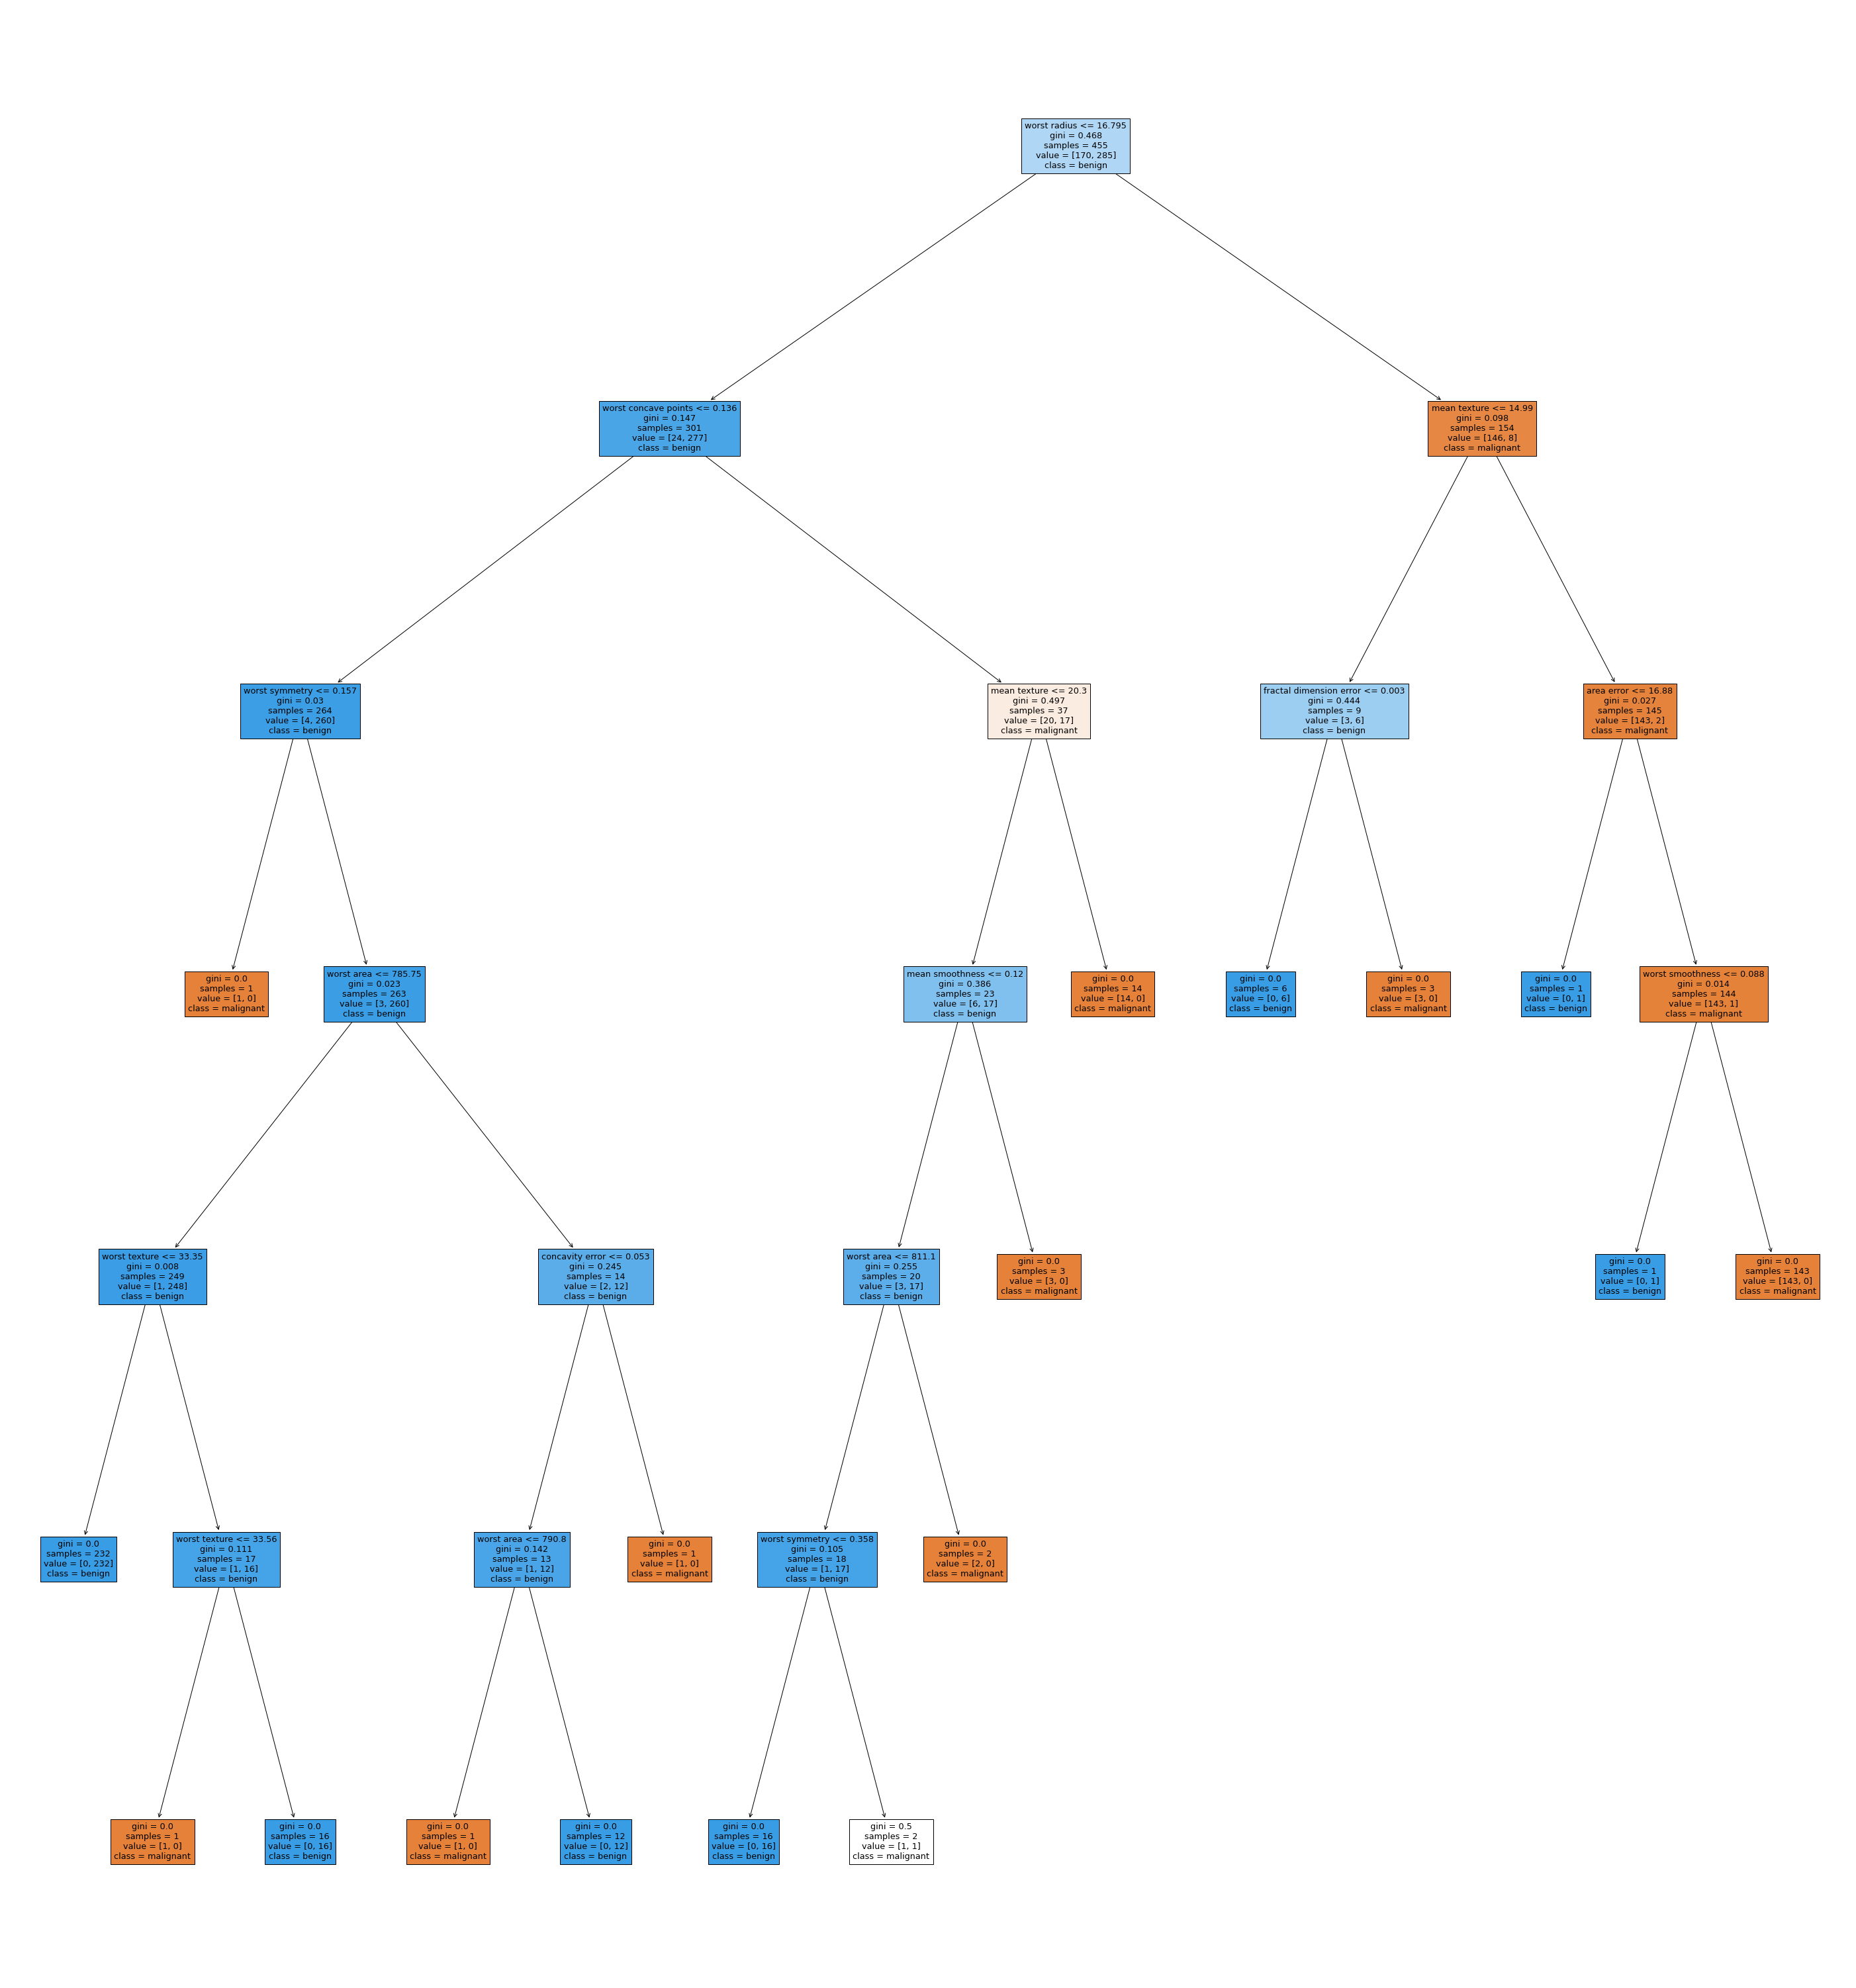

In [408]:
fig = plt.figure(figsize = (50, 55))
_ = tree.plot_tree(dt,
                 feature_names = breast['feature_names'],
                  class_names = breast['target_names'],
                   filled = True)
fig.savefig('tree.png')

In [411]:
dt.feature_importances_ # 변수의 중요도를 보여줌 -> 1에 가까울 수록 그만큼 중요하다는 것을 의미함

array([0.        , 0.07894066, 0.        , 0.        , 0.01778373,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00924067, 0.        ,
       0.        , 0.00746539, 0.        , 0.        , 0.01887086,
       0.72476103, 0.00939754, 0.        , 0.02626958, 0.00936991,
       0.        , 0.        , 0.08452065, 0.01337999, 0.        ])

In [ ]:
sns.x